# 1.9. Putting it all together in a professional way

## Imports

In [1]:
import numpy as np # conda install numpy
import tensorflow as tf 
import matplotlib.pyplot as plt # conda install matplotlib
import pandas as pd # conda install pandas
import warnings
import seaborn as sns # conda install seaborn

warnings.filterwarnings('ignore')

print(tf.__version__)

2.0.1


## Load data and take a look at it

In [2]:
data = pd.read_csv('airbnb new york.csv').sample(frac=1)
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## Data preprocessing

In [3]:
features = data[['neighbourhood_group', 'room_type', 'minimum_nights', 'number_of_reviews', 
                 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]
#print(features.isna().sum())
features['reviews_per_month'] = features['reviews_per_month'].fillna(0)
#print(features.isna().sum())

onehot_neighborhood_group = pd.get_dummies(features['neighbourhood_group'])
onehot_room_type = pd.get_dummies(features['room_type'])
#print(onehot_room_type)

features = features.drop(columns=['neighbourhood_group', 'room_type'])
features = pd.concat([features, onehot_neighborhood_group, onehot_room_type], axis=1)
#print(features.head())

targets = data['price']

train_size = int(0.7*len(data))
X_train, X_test = features.values[:train_size, :], features.values[train_size:, :]
y_train, y_test = targets.values[:train_size], targets.values[train_size:]

print(len(X_train[0]))

13


## Data visualization and analysis

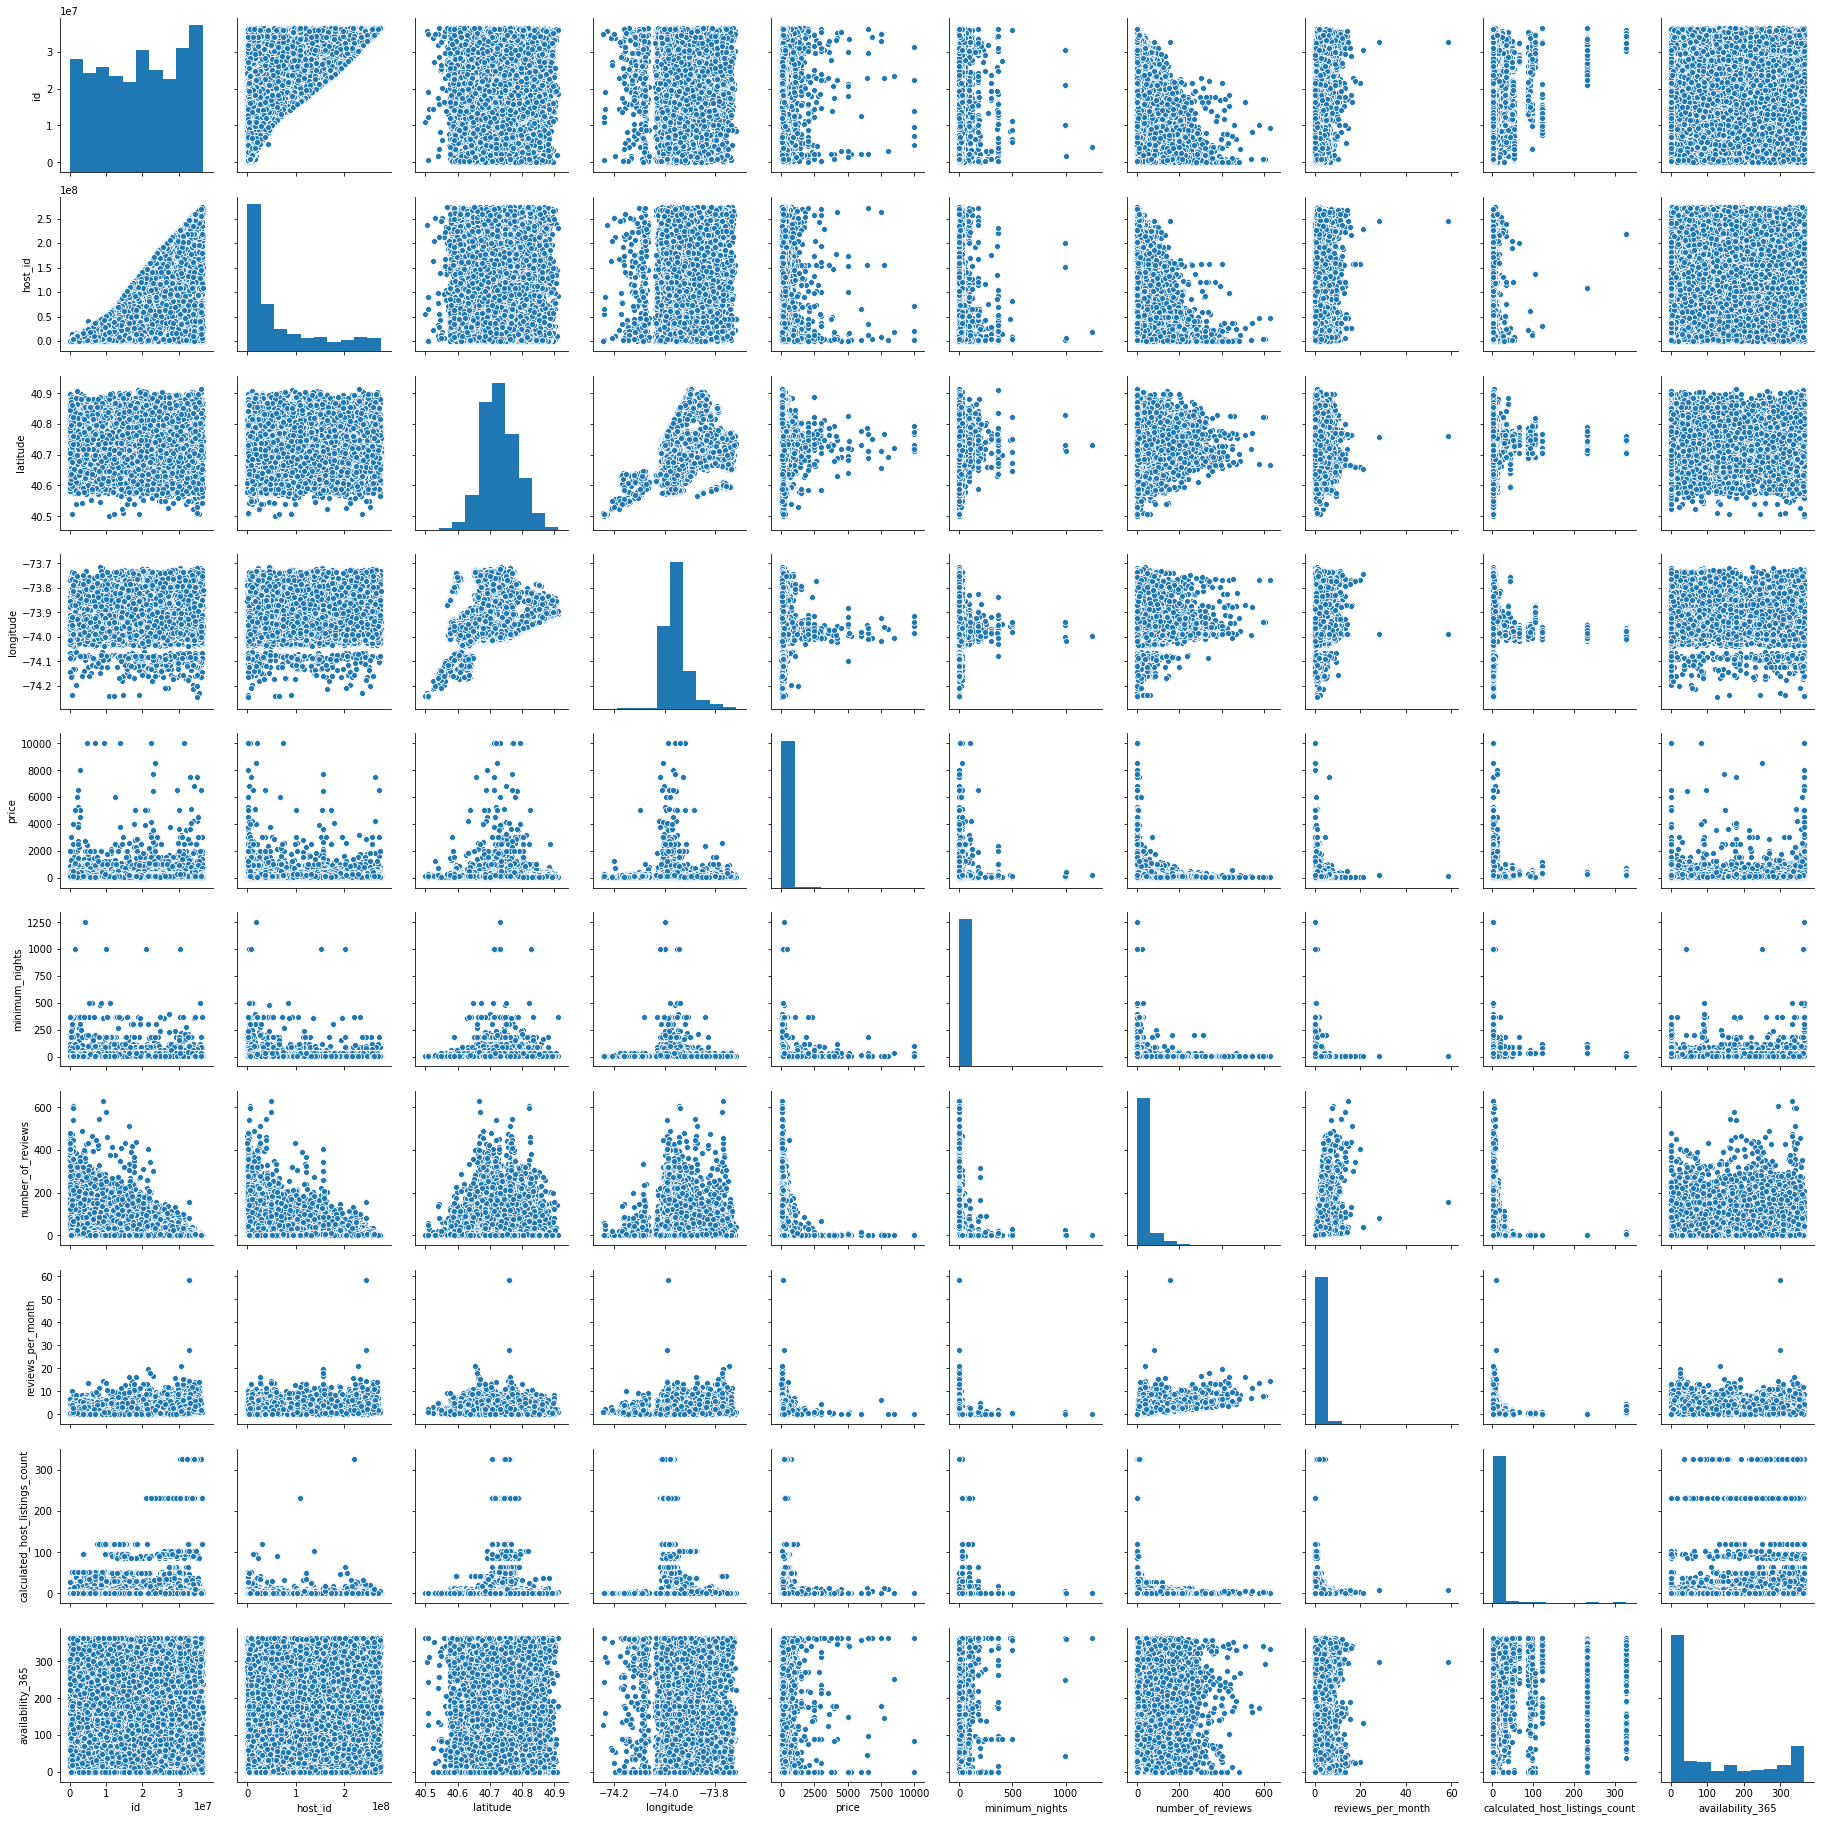

In [4]:
sns.pairplot(data)

In [ ]:
corr = data.corr()
cmap = sns.diverging_palette(250, 10, as_cmap=True)
plt.figure(figsize=(8, 8))
sns.heatmap(corr, square=True, cmap=cmap, annot=True)

## The Tensorflow 2 Machine Learning Approaches

## Multi Layer Perceptron (Artificial Neural Network)

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu'), # 0 or x: _____/
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

In [6]:
def R_squared(y_true, y_pred):
    residual = tf.reduce_sum(tf.square(y_true - y_pred))
    total = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    r2 = 1.0 - residual / total
    return r2

adam_optimizer = tf.keras.optimizers.Adam()
loss_fn = tf.keras.losses.MAE
model.compile(
    optimizer=adam_optimizer,
    loss=loss_fn,
    metrics=[
        tf.keras.metrics.MAE,
        tf.keras.metrics.MSE,
        R_squared, # -1 and 1, < 0 => useless, 0 and 1 => better close to 1
    ]
)

In [7]:
print(len(X_train[0]))
model.fit(X_train, y_train, epochs=10)
model.save('my ann.h5') 

13
Train on 34226 samples
Epoch 1/10
34226/34226 [==============================] - 2s 69us/sample - loss: 97.5276 - mean_absolute_error: 97.5275 - mean_squared_error: 54442.7617 - R_squared: -0.5341
Epoch 2/10
34226/34226 [==============================] - 2s 54us/sample - loss: 68.6969 - mean_absolute_error: 68.6969 - mean_squared_error: 46229.4414 - R_squared: 0.1435
Epoch 3/10
34226/34226 [==============================] - 2s 53us/sample - loss: 64.8124 - mean_absolute_error: 64.8124 - mean_squared_error: 44738.5820 - R_squared: 0.2291
Epoch 4/10
34226/34226 [==============================] - 2s 52us/sample - loss: 63.9745 - mean_absolute_error: 63.9745 - mean_squared_error: 44372.1836 - R_squared: 0.2528
Epoch 5/10
34226/34226 [==============================] - 2s 54us/sample - loss: 63.7280 - mean_absolute_error: 63.7280 - mean_squared_error: 44251.4492 - R_squared: 0.2543
Epoch 6/10
34226/34226 [==============================] - 2s 53us/sample - loss: 63.6260 - mean_absolute_err

In [24]:
loaded_model = tf.keras.models.load_model('my ann.h5', custom_objects={"R_squared": R_squared})
print(loaded_model.summary())
loaded_model.evaluate(X_test, y_test)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  1792      
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  129       
Total params: 1,921
Trainable params: 1,921
Non-trainable params: 0
_________________________________________________________________
None
14669/1 [==================================================================================================================================================================================================================================================================================================================================================================================

[63.27719954643377, 63.27719, 45032.445, 0.28917903]

In [25]:
print(loaded_model(X_test[:2]))
print(y_test[:2])


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

tf.Tensor(
[[136.05182]
 [180.15266]], shape=(2, 1), dtype=float32)
[130 270]


## Conclusions

* Sometimes the data set limits us WRT to results
* Data preprocessing and analysis is important - Tensorflow does not live in a bubble, it's a tool
* TF 2 simplifies many things: no more placeholders, eager execution, .numpy(), no more sessions, Keras has a bigger role
* ANNs are very sensitive to hyperparameter choice
* Running on GPU can help, but it's not a must
* You can do it!